In [1]:
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv('loan.csv')

# View first few rows
df.head()

,Gender,Married,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,Male,Yes,Graduate,5000,200,1.0,Y
1,Female,No,Not Graduate,3000,100,0.0,N
2,Male,Yes,Graduate,4000,150,1.0,Y
3,Male,Yes,Graduate,6000,250,1.0,Y
4,Female,No,Graduate,3500,120,0.0,N


In [2]:
# Shape of dataset
print("Shape:", df.shape)

# Column types and missing values
df.info()


Shape: (8, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8 non-null      object 
 1   Married          8 non-null      object 
 2   Education        8 non-null      object 
 3   ApplicantIncome  8 non-null      int64  
 4   LoanAmount       8 non-null      int64  
 5   Credit_History   8 non-null      float64
 6   Loan_Status      8 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 580.0+ bytes


In [3]:
# Statistical overview
df.describe()

,ApplicantIncome,LoanAmount,Credit_History
count,8.000000,8.00000,8.000000
mean,4125.000000,161.25000,0.625000
std,1747.447118,80.96516,0.517549
min,2000.000000,80.00000,0.000000
25%,2875.000000,97.50000,0.000000
50%,3750.000000,135.00000,1.000000
75%,5250.000000,212.50000,1.000000
max,7000.000000,300.00000,1.000000


In [4]:
# Check distribution of categorical columns
print(df['Gender'].value_counts())
print("\n")
print(df['Married'].value_counts())
print("\n")
print(df['Education'].value_counts())
print("\n")
print(df['Loan_Status'].value_counts())

Gender
Male      5
Female    3
Name: count, dtype: int64


Married
Yes    5
No     3
Name: count, dtype: int64


Education
Graduate        6
Not Graduate    2
Name: count, dtype: int64


Loan_Status
Y    5
N    3
Name: count, dtype: int64


In [5]:
# Missing values
df.isnull().sum()

Gender             0
Married            0
Education          0
ApplicantIncome    0
LoanAmount         0
Credit_History     0
Loan_Status        0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Encode categorical columns
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])  # Y=1, N=0

In [7]:
# Features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression()

# Train it
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.5
Confusion Matrix:
 [[1 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [12]:
y.value_counts()

Loan_Status
1    5
0    3
Name: count, dtype: int64

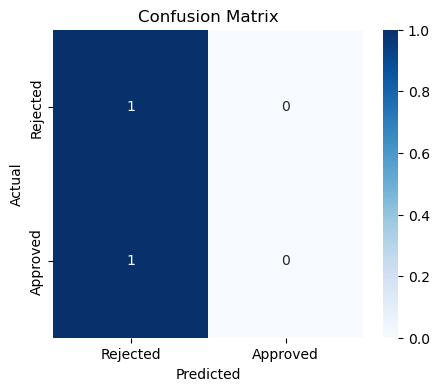

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected','Approved'], yticklabels=['Rejected','Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Compare side-by-side
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison.head(10)  # View first 10 predictions

,Actual,Predicted
0,0,0
1,1,0
